In [1]:
#Used for data manipulation
import numpy as np
import xarray as xr
from scipy import stats 
import pandas as pd
#Others
import time
#Data visualization
import datetime
from dateutil.rrule import rrule, DAILY, HOURLY
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MaxNLocator


In [2]:
#Time to get the data from AWS; download locally***
file = 'gdp_v2.00.nc'
#url_path = 'https://noaa-oar-hourly-gdp-pds.s3.amazonaws.com/latest/'
#ds = xr.open_dataset(url_path+file+'#mode=bytes')
url_path = '/Users/19082/Desktop/Drifter/'
ds = xr.open_dataset(url_path+file)

c:\Users\19082\miniconda3\lib\site-packages\xarray\backends\plugins.py:71: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [12]:
ds

<xarray.Dataset>
Dimensions:                (traj: 17324, obs: 165754333)
Coordinates:
    ID                     (traj) int64 ...
    longitude              (obs) float32 ...
    latitude               (obs) float32 ...
    time                   (obs) datetime64[ns] 2012-03-15T22:00:00 ... 1999-...
    ids                    (obs) int64 ...
Dimensions without coordinates: traj, obs
Data variables: (12/53)
    rowsize                (traj) int64 ...
    location_type          (traj) bool ...
    WMO                    (traj) int32 ...
    expno                  (traj) int32 ...
    deploy_date            (traj) datetime64[ns] ...
    deploy_lon             (traj) float32 ...
    ...                     ...
    err_sst                (obs) float32 ...
    err_sst1               (obs) float32 ...
    err_sst2               (obs) float32 ...
    flg_sst                (obs) int8 5 5 5 5 5 5 5 5 5 5 ... 0 0 0 0 0 0 0 0 0
    flg_sst1               (obs) int8 ...
    flg_sst2               (obs) int8 ...
Attributes: (12/15)
    title:             Global Drifter Program hourly drifting buoy collection
    history:           Version 2.00.  Metadata from dirall.dat and deplog.dat
    Conventions:       CF-1.6
    date_created:      2022-01-14T11:16:01.998226
    publisher_name:    GDP Drifter DAC
    publisher_email:   aoml.dftr@noaa.gov
    ...                ...
    metadata_link:     https://www.aoml.noaa.gov/phod/dac/dirall.html
    contributor_name:  NOAA Global Drifter Program
    contributor_role:  Data Acquisition Center
    institution:       NOAA Atlantic Oceanographic and Meteorological Laboratory
    acknowledgement:   Elipot et al. (2022) to be submitted. Elipot et al. (2...
    summary:           Global Drifter Program hourly data

In [4]:
data_subset1 = ds['time'].where((ds.time > np.datetime64('2000-09-03')) & (ds.time < np.datetime64('2000-10-03')), drop=True)

In [71]:
data_subset = ds[['time', 'sst', 'flg_sst']].where((ds.time > np.datetime64('2000-09-03')) & 
                                                   (ds.time < np.datetime64('2000-10-03')) & 
                                                   (ds.flg_sst ==5), drop=True)

(array([6688., 6651., 6943., 7070., 7022., 6971., 7149., 7074., 7194.,
        7327.]),
 array([11203.04166667, 11206.03333333, 11209.025     , 11212.01666667,
        11215.00833333, 11218.        , 11220.99166667, 11223.98333333,
        11226.975     , 11229.96666667, 11232.95833333]),
 <BarContainer object of 10 artists>)

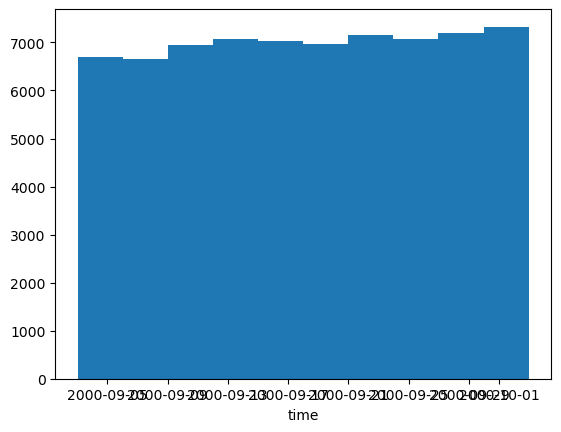

In [115]:
data_subset['time'].plot.hist()

In [83]:
data_subset['time'] = pd.to_datetime(data_subset['time'])
data_subset['time']


<xarray.DataArray 'time' (time: 70089)>
array(['2000-09-03T01:00:00.000000000', '2000-09-03T02:00:00.000000000',
       '2000-09-03T03:00:00.000000000', ..., '2000-10-02T21:00:00.000000000',
       '2000-10-02T22:00:00.000000000', '2000-10-02T23:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2000-09-03T01:00:00 ... 2000-10-02T23:00:00

In [100]:
days = data_subset['time.day']   # Gets days


In [101]:
total_time = data_subset['time'].max() - data_subset['time'].min()


In [90]:
data_subset['day'] = data_subset['time'].dt.day
data_subset['day']
data_subset.head()

<xarray.Dataset>
Dimensions:    (obs: 5, time: 5)
Coordinates:
  * time       (time) datetime64[ns] 2000-09-03T01:00:00 ... 2000-09-03T05:00:00
    longitude  (obs) float32 17.29 17.28 17.27 17.25 17.24
    latitude   (obs) float32 -34.53 -34.52 -34.52 -34.51 -34.51
    ids        (obs) int64 12221 12221 12221 12221 12221
Dimensions without coordinates: obs
Data variables:
    sst        (obs) float32 289.4 289.4 289.5 289.5 289.5
    flg_sst    (obs) float64 5.0 5.0 5.0 5.0 5.0
    day        (time) int64 3 3 3 3 3
Attributes: (12/15)
    title:             Global Drifter Program hourly drifting buoy collection
    history:           Version 2.00.  Metadata from dirall.dat and deplog.dat
    Conventions:       CF-1.6
    date_created:      2022-01-14T11:16:01.998226
    publisher_name:    GDP Drifter DAC
    publisher_email:   aoml.dftr@noaa.gov
    ...                ...
    metadata_link:     https://www.aoml.noaa.gov/phod/dac/dirall.html
    contributor_name:  NOAA Global Drifter Program
    contributor_role:  Data Acquisition Center
    institution:       NOAA Atlantic Oceanographic and Meteorological Laboratory
    acknowledgement:   Elipot et al. (2022) to be submitted. Elipot et al. (2...
    summary:           Global Drifter Program hourly data

In [57]:
np.histogram(a)


(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0], dtype=int64),
 array([  0,  30,  60,  90, 120, 150, 180, 210, 240, 270, 300, 330, 360,
        390, 420, 450, 480, 510, 540, 570, 600, 630, 660, 690, 720, 750,
        780, 810, 840, 870]))

input array would be time array; bin would be figure it out edges/num
pass time data only with flag 5 sst  finite value for pos and velo not an nan
count data point of time there is pos and velo, q5 diurnal, q5 sst
bincount

For loop in while loop?
while (start_date <= end_date):
    for i in (startdate, enddate)

Nothing works so far

In [40]:
ds.time

<xarray.DataArray 'time' (obs: 165754333)>
array(['2012-03-15T22:00:00.000000000', '2012-03-15T23:00:00.000000000',
       '2012-03-16T00:00:00.000000000', ..., '1999-10-26T12:00:00.000000000',
       '1999-10-26T13:00:00.000000000', '1999-10-26T14:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    longitude  (obs) float32 ...
    latitude   (obs) float32 ...
    time       (obs) datetime64[ns] 2012-03-15T22:00:00 ... 1999-10-26T14:00:00
    ids        (obs) int64 ...
Dimensions without coordinates: obs
Attributes:
    long_name:  Time

In [5]:
bin1 = datetime.date(1987, 10, 3)
bin2 = datetime.date(1987, 11, 3 )
#range = ds.sel(time = slice(bin1, bin2))
ds.where((ds.time.astype > bin1) and (ds.time.astype < bin2))


TypeError: data type 'datetime' not understood

In [5]:
data1 = ds['time'].where(ds.flg_sst==5).dropna('time')

In [3]:
data = ds.time.groupby(by = ds.where(ds.flg_sst==5), dropna = True)

MemoryError: Unable to allocate 20.9 TiB for an array with shape (17324, 165754333) and data type float64

In [4]:
data = ds.time.where(ds.flg_sst==5).dropna(dim = 'time')

In [ ]:
data = ds.time.where(ds.flg_sst==5)  # crashes

In [4]:
data = ds['time'].where(ds.flg_sst==5, drop = True)

MemoryError: Unable to allocate 1.18 GiB for an array with shape (158436770,) and data type int64

In [3]:
bin1 = datetime.date(1987, 10, 3)
bin2 = datetime.date(1987, 11, 3 )
bins = rrule(HOURLY, dtstart = bin1, until = bin2)
#histo = np.histogram(ds.time.where(ds.flg_sst==5), bins = bins) # crashes 

In [5]:

np.histogram(data, bins = bincount, range = [0, 1.e5])    # can bins be 240? 24 hours * 10 days?

TypeError: The DType <class 'numpy._FloatAbstractDType'> could not be promoted by <class 'numpy.dtype[datetime64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy._IntegerAbstractDType'>, <class 'numpy._FloatAbstractDType'>, <class 'numpy.dtype[datetime64]'>)

In [7]:
bin1 = datetime.date(1987, 10, 3)
bin2 = datetime.date(1997, 10, 3)
bins = rrule(HOURLY, dtstart = bin1, until = bin2)
data = ds['time'].where(ds.flg_sst==5)  # crashes
bincount = np.bincount(data)

ValueError: object of too small depth for desired array

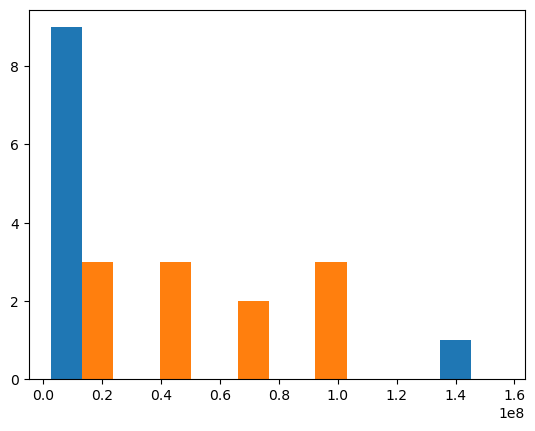

In [16]:
n, bins, patches = plt.hist(x = hist, bins = 'auto')

In [26]:
datasst = ds[["time", "sst"]].where(ds.flg_sst==5)

In [39]:
datasstarray

<xarray.DataArray (variable: 1, obs: 165754333)>
array([[293.884, 293.809, 293.757, ...,     nan,     nan,     nan]],
      dtype=float32)
Coordinates:
    time       (obs) datetime64[ns] 2012-03-15T22:00:00 ... 1999-10-26T14:00:00
    longitude  (obs) float32 -17.74 -17.75 -17.74 ... -30.27 -30.32 -30.37
    latitude   (obs) float32 14.75 14.76 14.77 14.78 ... 66.82 66.82 66.81 66.8
    ids        (obs) int64 101143 101143 101143 ... 9929870 9929870 9929870
  * variable   (variable) object 'sst'
Dimensions without coordinates: obs
Attributes: (12/15)
    title:             Global Drifter Program hourly drifting buoy collection
    history:           Version 2.00.  Metadata from dirall.dat and deplog.dat
    Conventions:       CF-1.6
    date_created:      2022-01-14T11:16:01.998226
    publisher_name:    GDP Drifter DAC
    publisher_email:   aoml.dftr@noaa.gov
    ...                ...
    metadata_link:     https://www.aoml.noaa.gov/phod/dac/dirall.html
    contributor_name:  NOAA Global Drifter Program
    contributor_role:  Data Acquisition Center
    institution:       NOAA Atlantic Oceanographic and Meteorological Laboratory
    acknowledgement:   Elipot et al. (2022) to be submitted. Elipot et al. (2...
    summary:           Global Drifter Program hourly data

In [32]:
datasstarray = datasst.to_array()
noNanArray = np.isfinite(datasstarray)
ssthist = np.histogram(noNanArray)    #have to fix range

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


(array([  7317563,         0,         0,         0,         0,         0,
                0,         0,         0, 158436770], dtype=int64),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


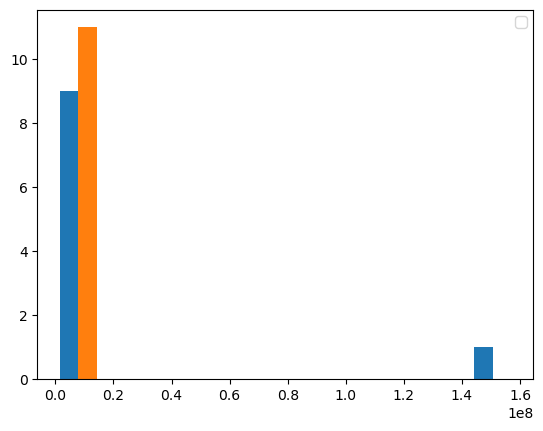

In [37]:
plt.hist(ssthist)
plt.legend()

In [3]:
datavn = ds.vn
np.histogram(ds.vn.values)
a = np.histogram(ds.vn, 100, (-1, 1))

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.]),
 array([6484., 6494., 6504., 6514., 6524., 6534., 6544., 6554., 6564.,
        6574., 6584., 6594., 6604., 6614., 6624., 6634., 6644., 6654.,
        6664., 6674., 6684., 6694., 6704., 6714., 6724., 6734., 6744.,
        6754., 6764., 6774., 6784., 6794., 6804., 6814., 6824., 6834.,
        6844., 6854., 6864., 6874., 6884., 6894., 6904., 6914., 6924.,
        6934., 6944., 6954., 6964., 6974., 6984., 6994., 7004., 7014.,
        7024., 7034., 7044., 7054., 7064., 7074., 7084., 7094., 7104.,
        7

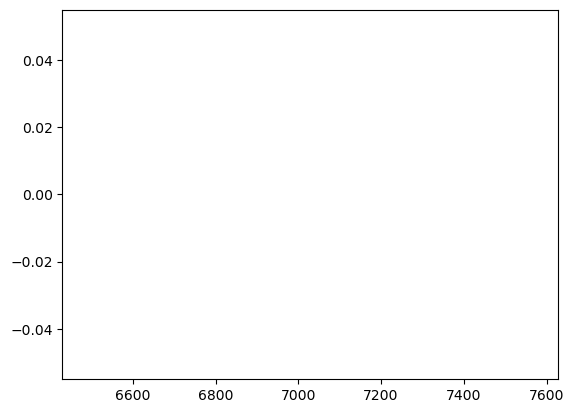

In [24]:
bin1 = datetime.date(1987, 10, 3)
bin2 = datetime.date(1997, 10, 3)
bins = rrule(HOURLY, dtstart = bin1, until = bin2)
timebin = pd.date_range("1987-10-3", "1990-10-3", freq = '10D')
plt.hist(ds.vn, bins = timebin )


Loops:

In [12]:
data

<xarray.DataArray 'sst' (obs: 165754333)>
array([293.884, 293.809, 293.757, ...,     nan,     nan,     nan],
      dtype=float32)
Coordinates:
    longitude  (obs) float32 -17.74 -17.75 -17.74 ... -30.27 -30.32 -30.37
    latitude   (obs) float32 14.75 14.76 14.77 14.78 ... 66.82 66.82 66.81 66.8
    time       datetime64[ns] 2000-10-03T01:00:00
    ids        (obs) int64 101143 101143 101143 ... 9929870 9929870 9929870
Dimensions without coordinates: obs
Attributes:
    long_name:  Fitted sea water temperature
    units:      Kelvin
    comments:   Estimated near-surface sea water temperature from drifting bu...

In [41]:
bin1 = datetime.datetime(2000, 10, 3, hour = 1)
bin2 = datetime.datetime(2000, 10, 3, hour = 3)
ssthist = {}
sst2hist = {}
posvelohist = {}
i = bin1
a = rrule(HOURLY, dtstart = bin1, until = bin2)
for ds['time'] in a:
    #if ds.time(ds.flg_sst==5):
    try:
        ds.time.where(ds.flg_sst==5)  # all we care about is if the flag is 5; if there is no measurement, flag wont be 5
        ssthist[i] = ssthist.get(i, 0) + 1  #trying to get ssthist[date:hour] = x for 10 days
    except IndexError:
        pass
    i = i + datetime.timedelta(hours = 1)

In [50]:
bin1 = datetime.datetime(2000, 10, 3, hour = 1)
bin2 = datetime.datetime(2000, 10, 3, hour = 3)
ssthist = {}
sst2hist = {}
posvelohist = {}
i = bin1
a = rrule(HOURLY, dtstart = bin1, until = bin2)
for ds['time'] in a:
    if(ds.time.where(ds.flg_sst==5).all):
        ssthist[i] = ssthist.get(i, 0) + 1  #trying to get ssthist[date:hour] = x for 10 days
    i = i + datetime.timedelta(hours = 1)

In [51]:
ssthist

{datetime.datetime(2000, 10, 3, 1, 0): 1,
 datetime.datetime(2000, 10, 3, 2, 0): 1,
 datetime.datetime(2000, 10, 3, 3, 0): 1}

In [26]:
bin1 = datetime.datetime(2000, 10, 3, hour = 1)
bin2 = datetime.datetime(2000, 10, 6, hour = 1)
ssthist = {}
sst2hist = {}
posvelohist = {}
i = bin1
for ds['time'] in rrule(HOURLY, dtstart = bin1, until = bin2):  # i gets assigned as the current date?
    try:
        ds.time.where(ds.flg_sst==5)  # all we care about is if the flag is 5; if there is no measurement, flag wont be 5
        ssthist[i] = ssthist.get(i, 0) + 1  #trying to get ssthist[date:hour] = x for 10 days
    except IndexError:
        pass
    i = i + datetime.timedelta(hours = 1)

In [5]:
bin1 = datetime.datetime(2000, 10, 3, hour = 1)
bin2 = datetime.datetime(2000, 10, 6, hour = 1)
ssthist = {}
sst2hist = {}
posvelohist = {}
i = bin1
for ds['time'] in rrule(HOURLY, dtstart = bin1, until = bin2):  # i gets assigned as the current date?
    if(ds.flg_sst ==5):
        ssthist[i] = ssthist.get(i, 0) + 1  #trying to get ssthist[date:hour] = x for 10 days
        i = i + datetime.timedelta(hours = 1)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [29]:
bin1 = datetime.datetime(2000, 10, 3, hour = 1)
bin2 = datetime.datetime(2000, 10, 3, hour = 3)
ssthist = {}
sst2hist = {}
posvelohist = {}
i = bin1
for ds['time'] in rrule(HOURLY, dtstart = bin1, until = bin2):  # i gets assigned as the current date?
    if(ds.time.where(ds.flg_sst==5).all):  # all we care about is if the flag is 5; if there is no measurement, flag wont be 5
        ssthist[i] = ssthist.get(i, 0) + 1  #trying to get ssthist[date:hour] = x for 10 days
    i = i + datetime.timedelta(hours = 1)

In [37]:
bin1 = datetime.datetime(2000, 10, 3, hour = 1)
bin2 = datetime.datetime(2000, 10, 3, hour = 6)
i = bin1
a = ds.time.where(ds.flg_sst==5)
for a in rrule(HOURLY, dtstart = bin1, until = bin2):  
        ssthist[i] = ssthist.get(i, 0) + 1  #trying to get ssthist[date:hour] = x for 10 days
        i = i + datetime.timedelta(hours = 1)


In [57]:
ssthist

{datetime.datetime(2000, 10, 3, 1, 0): 1,
 datetime.datetime(2000, 10, 3, 2, 0): 1,
 datetime.datetime(2000, 10, 3, 3, 0): 1,
 datetime.datetime(2000, 10, 3, 4, 0): 1,
 datetime.datetime(2000, 10, 3, 5, 0): 1,
 datetime.datetime(2000, 10, 3, 6, 0): 1,
 datetime.datetime(2000, 10, 3, 7, 0): 1,
 datetime.datetime(2000, 10, 3, 8, 0): 1,
 datetime.datetime(2000, 10, 3, 9, 0): 1,
 datetime.datetime(2000, 10, 3, 10, 0): 1,
 datetime.datetime(2000, 10, 3, 11, 0): 1,
 datetime.datetime(2000, 10, 3, 12, 0): 1,
 datetime.datetime(2000, 10, 3, 13, 0): 1,
 datetime.datetime(2000, 10, 3, 14, 0): 1,
 datetime.datetime(2000, 10, 3, 15, 0): 1,
 datetime.datetime(2000, 10, 3, 16, 0): 1,
 datetime.datetime(2000, 10, 3, 17, 0): 1,
 datetime.datetime(2000, 10, 3, 18, 0): 1,
 datetime.datetime(2000, 10, 3, 19, 0): 1,
 datetime.datetime(2000, 10, 3, 20, 0): 1,
 datetime.datetime(2000, 10, 3, 21, 0): 1,
 datetime.datetime(2000, 10, 3, 22, 0): 1,
 datetime.datetime(2000, 10, 3, 23, 0): 1,
 datetime.datetime(2

In [ ]:
bin1 = datetime.date(1987, 10, 3)
bin2 = datetime.date(1987, 10, 13)
ssthist = {}
sst2hist = {}
posvelohist = {}
for i in rrule(DAILY, dtstart = bin1, until = bin2):  # i gets assigned as the current date?
    try:
        ds.sst.where(ds.flg_sst==5)  # all we care about is if the flag is 5; if there is no measurement, flag wont be 5
        ssthist[i] = ssthist.get(i, 0) + 1  #trying to get ssthist[daterange] =  for 10 days
    except IndexError:
        pass
    try:
        ds.sst2.where(ds.flg_sst2==5)
        sst2hist[i] = sst2hist.get(i, 0) + 1
    except IndexError:
        pass
    try:
        ds.longitude
        posvelohist[i] = posvelohist.get(i, 0) + 1
    except IndexError:
        pass
    bin1 = bin1 + datetime.timedelta(days = 10)

        #Took 42 seconds for 1 day...
        #Let run for 3 minutes and got through 4 tallies

In [ ]:
timebin = pd.date_range(start='1987-10-03T13:00:00.000000000', end='2020-06-30T23:00:00.000000000', freq='10D')
bin1 = datetime.date(1987, 10, 3)
bin2 = datetime.date(1987, 10, 4)
ssthist = {}
sst2hist = {}
posvelohist = {}
for ds['time'] in rrule(HOURLY, dtstart = bin1, until = bin2):
    try:
        ds.sst.where(ds.flg_sst==5)  # all we care about is if the flag is 5; if there is no measurement, flag wont be 5
        ssthist[bin1] = ssthist.get(bin1, 0) + 1  #trying to get ssthist[date] = ... 
    except IndexError:
        pass
    try:
        ds.sst2.where(ds.flg_sst2==5)
        sst2hist[bin1] = sst2hist.get(bin1, 0) + 1
    except IndexError:
        pass
    try:
        ds.longitude
        posvelohist[bin1] = posvelohist.get(bin1, 0) + 1
    except IndexError:
        pass
    

In [7]:
plt.hist(ds['vn'].values)

MemoryError: Unable to allocate 632. MiB for an array with shape (165754333,) and data type float32

In [7]:
bin1 = datetime.date(1987, 10, 3)
bin2 = datetime.date(1987, 10, 13)
ds.sel(time = "1987-10-3")

KeyError: "no index found for coordinate 'time'"